In [1]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib, tarfile, shutil, os, glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import HTML
HTML('''<script> code_show=true; 
function code_toggle() {
 if (code_show){$('div.input').hide();}
 else {$('div.input').show();}
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script> To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')                             

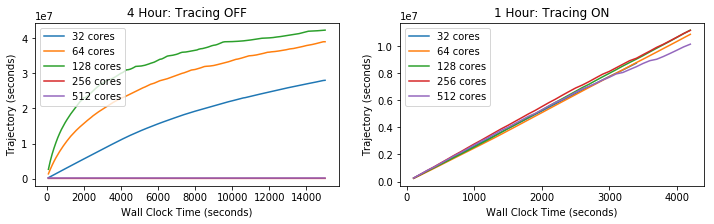

In [17]:
RAW_DF   = 0
COUNT_DF = 1
rank_names = {"00": "Splicer", "01": "Worker", "02": "PersistentDB", "03": "InMemoryDB", "04": "WorkManager", -1: "all ranks"}

def untar(fname):
    try: shutil.rmtree("tmp")
    except: pass
    os.mkdir("tmp")
    tar = tarfile.open(fname)
    tar.extractall()
    tar.close()

def plot_times(ax, label, results):
    if os.path.exists(results + "/times.out"):
        df = pd.read_csv(results + "/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    else:
        untar(results + "/times.tar.gz")
        shutil.move("times.out", "tmp/times.out")                
        df = pd.read_csv("tmp/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    ax.plot(df["wc"], df["traj"], label=label)
    ax.set_ylabel("Trajectory (seconds)")
    ax.set_xlabel("Wall Clock Time (seconds)")
    ax.legend()

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
d = "../experiments/baseline-trinitite/"
ax[0].set_title("4 Hour: Tracing OFF")
plot_times(ax[0], "32 cores", d+"nano/parmsweep/scale-length-hr4-59971")
plot_times(ax[0], "64 cores",  d+"nano/scale-cores-notracing/scale-tasks-64-61226")
plot_times(ax[0], "128 cores", d+"nano/scale-cores-notracing/scale-tasks-128-61245")
plot_times(ax[0], "256 cores", d+"nano/scale-cores-notracing/scale-tasks-256-61246")
plot_times(ax[0], "512 cores", d+"nano/scale-cores-notracing/scale-tasks-512-61247")

ax[1].set_title("1 Hour: Tracing ON")
plot_times(ax[1], "32 cores",  d+"nano/parmsweep/scale-delay-1000000-60120")
plot_times(ax[1], "64 cores",  d+"nano/parmsweep/scale-tasks-64-59958")
plot_times(ax[1], "128 cores", d+"nano/parmsweep/scale-tasks-128-59959")
plot_times(ax[1], "256 cores", d+"nano/parmsweep/scale-tasks-256-59962")
plot_times(ax[1], "512 cores", d+"nano/parmsweep/scale-tasks-512-59963")